# Contents

1. Transformer based architecture types and tasks
2. Tasks

*   Sentiment classification
*   POS Tagging
*   NER





# 1. Transformer based architecture types and tasks

Transformer based Architectures:



1.   Encoder models
2.   Decoder models
3.   Encoder-Decoder models



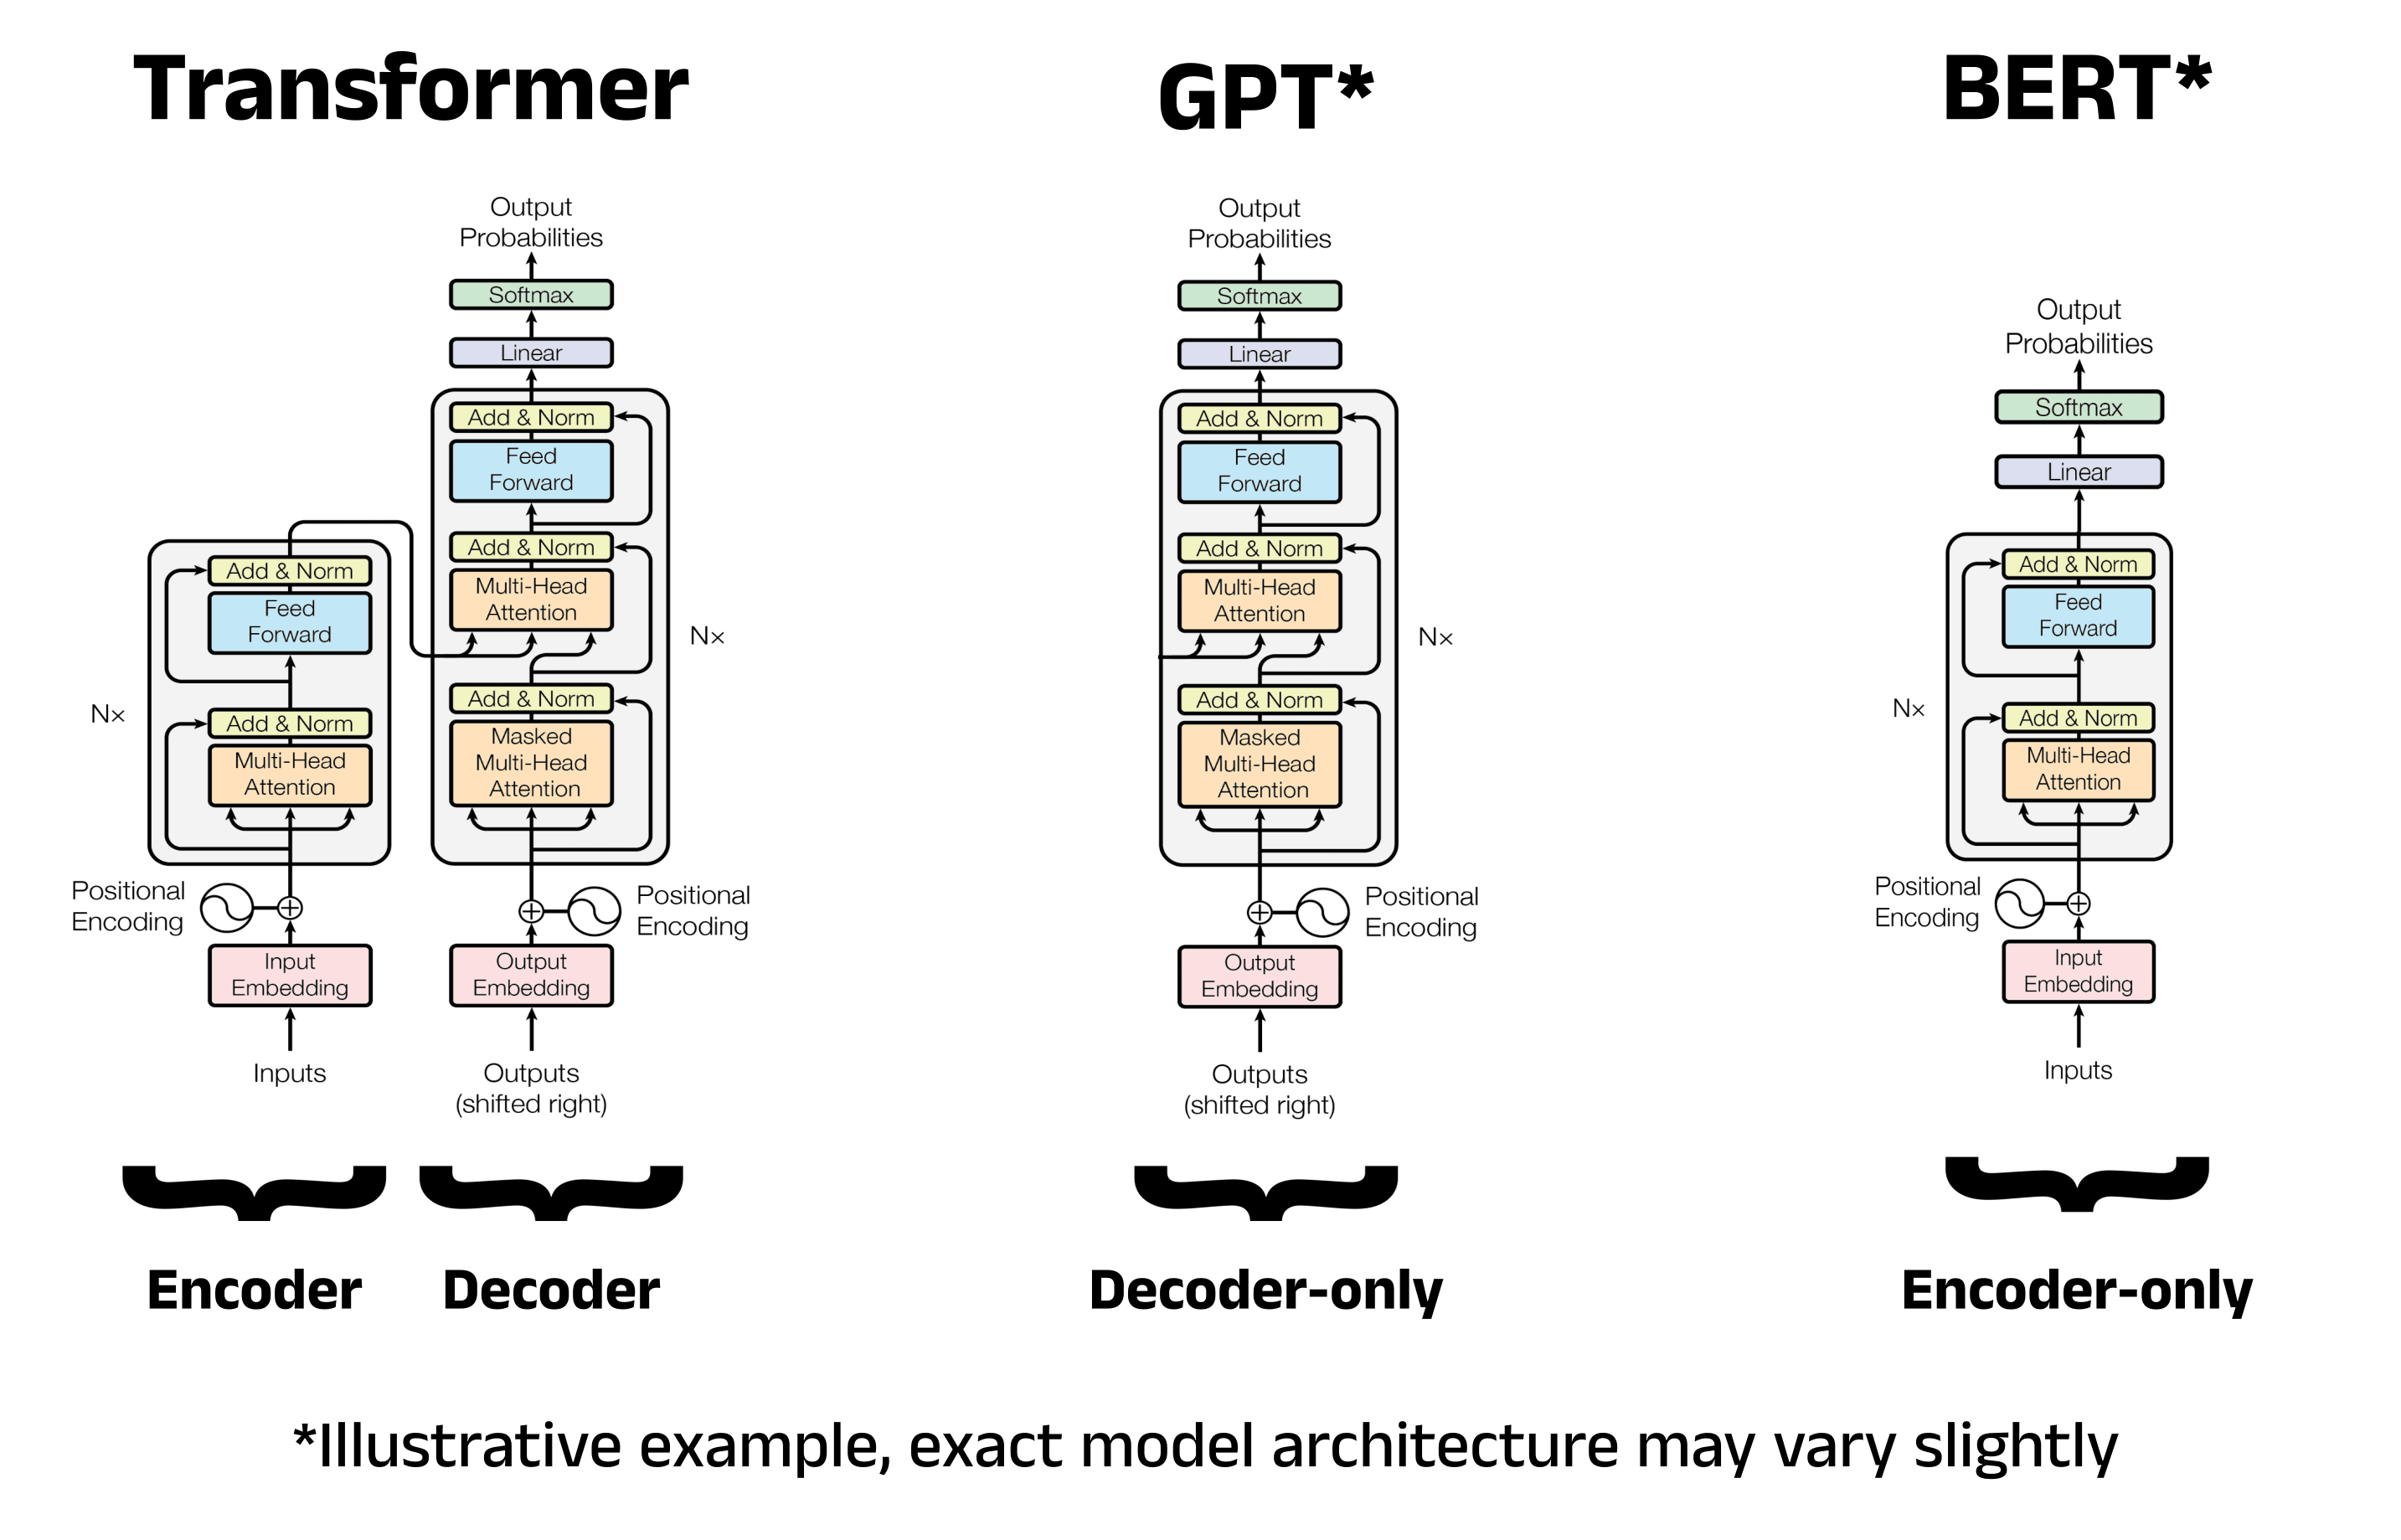

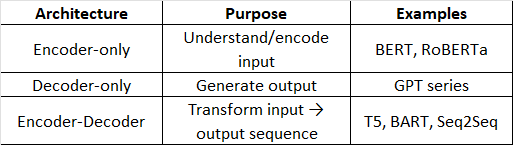

**Tasks examples:**
1. Encoder:

Text classification (sentiment analysis, spam detection)

Named entity recognition (NER)

Parts-of-speech tagging (POS)

2. Decoder:

Text generation

Autocomplete / chatbots

3. Encoder-Decoder:

Machine translation (English → French)

Summarization

Question answering



**Although the tasks are mostly suitable for some models, we can still use other types of models for this task. But the results would not as good as the specific model.**

# Requirement of finetuning:
If a model is pre-trained on some task or similar tasks, we often don't need to finetune on the task.

But if the model is trained on not related tasks, then we need to finetune on the target task.

# 2.1. Task 1: Sentiment classification

The task is to classify the segntiment of the sentence, for e.g., "I love this movie" has positive sentiment.

Let's compare three models here:

BERT (Base, uncased) -> Encoder based model, uncased means the texts are preprocessed to lower cases

Bart (large) -> Encoder-Decoder based model

Bart (large, mnli) -> Bart model pre-trained in natural language inference task

In [2]:
import torch
!pip install transformers torch -q
from transformers import pipeline

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [10]:
# BERT

classifier = pipeline(task="zero-shot-classification",
    model="google-bert/bert-base-uncased",
    device=device      # Device (where to run the inference)
)

text = "I love this movie. but I hate the ending."
labels = ["positive", "negative", "neutral"]

result = classifier(text, candidate_labels=labels)
print("Text:", text)
print("Predicted label:", result["labels"][0], "with confidence", round(result["scores"][0], 3))
print(result)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cuda
Failed to determine 'entailment' label id from the label2id mapping in the model config. Setting to -1. Define a descriptive label2id mapping in the model config to ensure correct outputs.


Text: I love this movie. but I hate the ending.
Predicted label: negative with confidence 0.453
{'sequence': 'I love this movie. but I hate the ending.', 'labels': ['negative', 'positive', 'neutral'], 'scores': [0.4534766376018524, 0.3614957630634308, 0.1850275993347168]}


In [13]:
# BART

classifier = pipeline(task="zero-shot-classification",
    model="facebook/bart-large")

text = "I love this movie."
labels = ["positive", "negative", "neutral"]

result = classifier(text, candidate_labels=labels)
print("Text:", text)
print("Predicted label:", result["labels"][0], "with confidence", round(result["scores"][0], 3))
print(result)

Some weights of BartForSequenceClassification were not initialized from the model checkpoint at facebook/bart-large and are newly initialized: ['classification_head.dense.bias', 'classification_head.dense.weight', 'classification_head.out_proj.bias', 'classification_head.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cuda:0
Failed to determine 'entailment' label id from the label2id mapping in the model config. Setting to -1. Define a descriptive label2id mapping in the model config to ensure correct outputs.


Text: I love this movie.
Predicted label: neutral with confidence 0.348
{'sequence': 'I love this movie.', 'labels': ['neutral', 'negative', 'positive'], 'scores': [0.34810376167297363, 0.3376409411430359, 0.3142552971839905]}


In [12]:
# BART (MNLI)

classifier = pipeline(task="zero-shot-classification",
    model = "facebook/bart-large-mnli"
)

text = "I love this movie."
labels = ["positive", "negative", "neutral"]

result = classifier(text, candidate_labels=labels)
print("Text:", text)
print("Predicted label:", result["labels"][0], "with confidence", round(result["scores"][0], 3))
print(result)

Device set to use cuda:0


Text: I love this movie.
Predicted label: positive with confidence 0.965
{'sequence': 'I love this movie.', 'labels': ['positive', 'neutral', 'negative'], 'scores': [0.9653113484382629, 0.02364947460591793, 0.011039220727980137]}


**Results:**

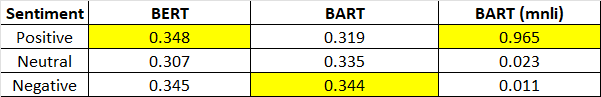

**BERT:**

Positive is predicted, but score is not convincing. Reason: BERT is not trained on sentiment classification task. For using BERT in sentiment classification task, we have to finetune it on sentiment classification dataset.

**BART:**

Negative is predicted, because it is encoder-decoder model.

**BART (mnli):**

Positive is predicted with high confidence. Although it is an encoder-decoder model, it is specially trained for task like sentiment classification, which gives it superior performance.

# 2.2. Task 2: Parts-of-speech (POS) Tagging

POS tagging assigns a part of speech (like noun, verb, adjective) to each word in a sentence.

The → Determiner (DT)

quick → Adjective (JJ)

brown → Adjective (JJ)

fox → Noun (NN)

jumps → Verb (VBZ)

over → Preposition (IN)

the → Determiner (DT)

lazy → Adjective (JJ)

dog → Noun (NN)

In [16]:
pos_tagger = pipeline(task="token-classification", model="vblagoje/bert-english-uncased-finetuned-pos")

sentence = "The quick brown fox jumps over the lazy dog. Ruksad is starving."

result = pos_tagger(sentence)
print(result)
for token_info in result:
    print(token_info['word'], token_info['entity'])


Some weights of the model checkpoint at vblagoje/bert-english-uncased-finetuned-pos were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda:0


[{'entity': 'DET', 'score': np.float32(0.99944717), 'index': 1, 'word': 'the', 'start': 0, 'end': 3}, {'entity': 'ADJ', 'score': np.float32(0.997259), 'index': 2, 'word': 'quick', 'start': 4, 'end': 9}, {'entity': 'ADJ', 'score': np.float32(0.9704901), 'index': 3, 'word': 'brown', 'start': 10, 'end': 15}, {'entity': 'NOUN', 'score': np.float32(0.9972435), 'index': 4, 'word': 'fox', 'start': 16, 'end': 19}, {'entity': 'VERB', 'score': np.float32(0.9993125), 'index': 5, 'word': 'jumps', 'start': 20, 'end': 25}, {'entity': 'ADP', 'score': np.float32(0.999191), 'index': 6, 'word': 'over', 'start': 26, 'end': 30}, {'entity': 'DET', 'score': np.float32(0.9995333), 'index': 7, 'word': 'the', 'start': 31, 'end': 34}, {'entity': 'ADJ', 'score': np.float32(0.9980088), 'index': 8, 'word': 'lazy', 'start': 35, 'end': 39}, {'entity': 'NOUN', 'score': np.float32(0.99880433), 'index': 9, 'word': 'dog', 'start': 40, 'end': 43}, {'entity': 'PUNCT', 'score': np.float32(0.9996543), 'index': 10, 'word': '

# 2.3. Task 3: NER (Named Entity Recognition)

NER identifies named entities in text, such as people, locations, organizations, dates, etc.

Example:

“Barack Obama was born in Hawaii and served as the President of the United States.”

NER tags:

Barack Obama → Person (PER)

Hawaii → Location (LOC)

Harvard → Organization (ORG)

In [21]:
ner_pipeline = pipeline("ner", model="dslim/bert-base-NER")

text = "Ruksad passed away on June 5th, 2020."
entities = ner_pipeline(text)

print(entities)

for ent in entities:
    print(f"{ent['word']} → {ent['entity']}")


Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda:0


[{'entity': 'B-PER', 'score': np.float32(0.99927026), 'index': 1, 'word': 'R', 'start': 0, 'end': 1}, {'entity': 'B-PER', 'score': np.float32(0.9616958), 'index': 2, 'word': '##uk', 'start': 1, 'end': 3}, {'entity': 'I-PER', 'score': np.float32(0.9528), 'index': 3, 'word': '##sad', 'start': 3, 'end': 6}]
R → B-PER
##uk → B-PER
##sad → I-PER


For NER task, the model predicts in token level, three types of named entities are there:

B → Beginning of an entity

I → Inside of an entity

O → Outside, i.e., not part of any entity

To aggregate the same name entity we can use "aggregation_strategy" as pipeline input.

aggregation_strategy="simple" -> Groups consecutive tokens with the same entity type into a single entity.

In [24]:
ner_pipeline = pipeline("ner", model="dslim/bert-base-NER", aggregation_strategy="simple")

text = "Barack Obama was born in Hawaii and studied at Harvard."
entities = ner_pipeline(text)

print(entities)

for ent in entities:
    print(f"{ent['word']} → {ent['entity_group']}")


Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda:0


[{'entity_group': 'PER', 'score': np.float32(0.99932593), 'word': 'Barack Obama', 'start': 0, 'end': 12}, {'entity_group': 'LOC', 'score': np.float32(0.9997694), 'word': 'Hawaii', 'start': 25, 'end': 31}, {'entity_group': 'ORG', 'score': np.float32(0.9871186), 'word': 'Harvard', 'start': 47, 'end': 54}]
Barack Obama → PER
Hawaii → LOC
Harvard → ORG


You can also control in the model or tokenizer using AutoModelForTokenClassification or AutoTokenizer.

In [27]:
# This is with no change in configuration
from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline, AutoConfig

model_name = "vblagoje/bert-english-uncased-finetuned-pos"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForTokenClassification.from_pretrained(model_name)
print(AutoConfig.from_pretrained(model_name))
print("\n",AutoConfig.from_pretrained(model_name).to_dict())

pos_tagger = pipeline("token-classification", model=model, tokenizer=tokenizer)

sentence = "The quick brown fox jumps over the lazy dog."

result = pos_tagger(sentence)
print(result)
for token_info in result:
    print(token_info['word'], token_info['entity'])


Some weights of the model checkpoint at vblagoje/bert-english-uncased-finetuned-pos were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BertConfig {
  "architectures": [
    "BertForTokenClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "ADJ",
    "1": "ADP",
    "2": "ADV",
    "3": "AUX",
    "4": "CCONJ",
    "5": "DET",
    "6": "INTJ",
    "7": "NOUN",
    "8": "NUM",
    "9": "PART",
    "10": "PRON",
    "11": "PROPN",
    "12": "PUNCT",
    "13": "SCONJ",
    "14": "SYM",
    "15": "VERB",
    "16": "X"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "ADJ": 0,
    "ADP": 1,
    "ADV": 2,
    "AUX": 3,
    "CCONJ": 4,
    "DET": 5,
    "INTJ": 6,
    "NOUN": 7,
    "NUM": 8,
    "PART": 9,
    "PRON": 10,
    "PROPN": 11,
    "PUNCT": 12,
    "SCONJ": 13,
    "SYM": 14,
    "VERB": 15,
    "X": 16
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_he

Device set to use cuda:0



 {'return_dict': True, 'output_hidden_states': False, 'torchscript': False, 'dtype': None, 'pruned_heads': {}, 'tie_word_embeddings': True, 'chunk_size_feed_forward': 0, 'is_encoder_decoder': False, 'is_decoder': False, 'cross_attention_hidden_size': None, 'add_cross_attention': False, 'tie_encoder_decoder': False, 'architectures': ['BertForTokenClassification'], 'finetuning_task': None, 'id2label': {0: 'ADJ', 1: 'ADP', 2: 'ADV', 3: 'AUX', 4: 'CCONJ', 5: 'DET', 6: 'INTJ', 7: 'NOUN', 8: 'NUM', 9: 'PART', 10: 'PRON', 11: 'PROPN', 12: 'PUNCT', 13: 'SCONJ', 14: 'SYM', 15: 'VERB', 16: 'X'}, 'label2id': {'ADJ': 0, 'ADP': 1, 'ADV': 2, 'AUX': 3, 'CCONJ': 4, 'DET': 5, 'INTJ': 6, 'NOUN': 7, 'NUM': 8, 'PART': 9, 'PRON': 10, 'PROPN': 11, 'PUNCT': 12, 'SCONJ': 13, 'SYM': 14, 'VERB': 15, 'X': 16}, 'task_specific_params': None, 'problem_type': None, 'tokenizer_class': None, 'prefix': None, 'bos_token_id': None, 'pad_token_id': 0, 'eos_token_id': None, 'sep_token_id': None, 'decoder_start_token_id': 

In [26]:
model_name = "vblagoje/bert-english-uncased-finetuned-pos"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Add a special token
tokenizer.add_special_tokens({'additional_special_tokens': ['<CUSTOM>']})

model = AutoModelForTokenClassification.from_pretrained(model_name)
model.resize_token_embeddings(len(tokenizer))  # adjust embedding layer

# Change dropout in classifier
model.dropout.p = 0.3

pos_tagger = pipeline("token-classification", model=model, tokenizer=tokenizer)

sentence_tokens = ["The", "quick", "brown", "fox", "<CUSTOM>", "jumps", "over", "the", "lazy", "dog"]
result = pos_tagger(sentence_tokens, is_split_into_words=True)
print(result)
for token_info in result[0]:
    print(token_info['word'], token_info['entity'])


Some weights of the model checkpoint at vblagoje/bert-english-uncased-finetuned-pos were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
The new embeddings will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`
Device set to use cuda:0


[[{'entity': 'DET', 'score': np.float32(0.9994098), 'index': 1, 'word': 'the', 'start': 0, 'end': 3}, {'entity': 'ADJ', 'score': np.float32(0.9966041), 'index': 2, 'word': 'quick', 'start': 4, 'end': 9}, {'entity': 'ADJ', 'score': np.float32(0.9339238), 'index': 3, 'word': 'brown', 'start': 10, 'end': 15}, {'entity': 'NOUN', 'score': np.float32(0.9963058), 'index': 4, 'word': 'fox', 'start': 16, 'end': 19}, {'entity': 'PUNCT', 'score': np.float32(0.7380303), 'index': 5, 'word': '<CUSTOM>', 'start': 20, 'end': 28}, {'entity': 'VERB', 'score': np.float32(0.9993975), 'index': 6, 'word': 'jumps', 'start': 29, 'end': 34}, {'entity': 'ADP', 'score': np.float32(0.9993411), 'index': 7, 'word': 'over', 'start': 35, 'end': 39}, {'entity': 'DET', 'score': np.float32(0.99950147), 'index': 8, 'word': 'the', 'start': 40, 'end': 43}, {'entity': 'ADJ', 'score': np.float32(0.99812824), 'index': 9, 'word': 'lazy', 'start': 44, 'end': 48}, {'entity': 'NOUN', 'score': np.float32(0.99888545), 'index': 10, 

# Discussion:

1. Encoder models are most suitable for Sentiment analysis, POS and NER tasks. However, encoder-decoder models can also work on these tasks, if they are pretrained on corresponding datasets.

2. Sentiment analysis is a sentence/passage level task, whereas POS and NER are token level (word level) tasks.

# Tasks:

1. Use BERT base uncased model (not pre-trained on POS/NER task) for POS/NER tasks and compare with previous results.

2. Use some pre-trained (if available) and not pre-trained Encoder-Decoder and Decoder based model for POS/NER tasks and compare the results with the encoder models. (Pre-trained signifies on that task.)